In [1]:
# From: https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [12]:
import gensim
from gensim.models import word2vec
import os
import traceback
from visualize_wordvecs import make_word_vec_plot
home = os.path.expanduser("~")

model_path = home + '/data/workshop_data/GoogleNews-vectors-negative300.bin.gz'

In [3]:
file_id = '0B7XkCwpI5KDYNlNUTTlSS21pQmM'
try:
    import boto3
    s3 = boto3.resource('s3')
    s3.Bucket('workshopqcondata').download_file('data/GoogleNews-vectors-negative300.bin.gz', model_path)
except:
    if not os.path.exists(model_path):
        download_file_from_google_drive(file_id, model_path)

In [5]:
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [29]:
words = ['woman', 'man', 'queen', 'king', 'water']
vecs = [model[word] for word in words]

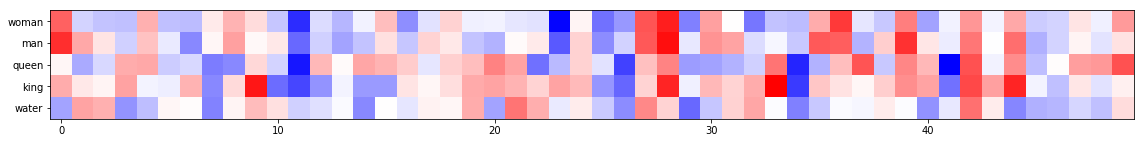

In [33]:
fig = make_word_vec_plot(words, [vec[:50] for vec in vecs])
fig.show()

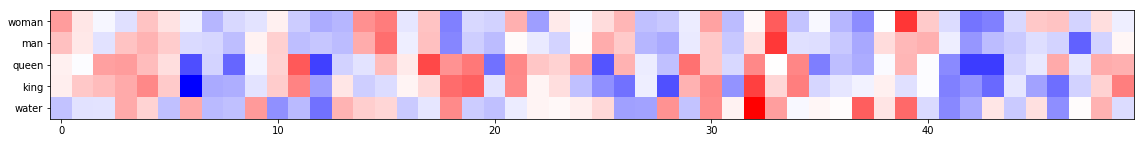

In [34]:
fig = make_word_vec_plot(words, [vec[250:] for vec in vecs])
fig.show()